<a href="https://colab.research.google.com/github/shristielizabeth/cancer_survival_model/blob/main/Data_Description_and_Approach_Labiba_Sarwer_CIND820.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from google.colab import files
import os

# Install lifelines if not installed
try:
    from lifelines import KaplanMeierFitter
except ModuleNotFoundError:
    import subprocess
    subprocess.check_call(["pip", "install", "lifelines"])
    from lifelines import KaplanMeierFitter

In [ ]:
# Check if file exists, if not, prompt for upload
file_path = 'breast_cancer_data.csv'
if not os.path.exists(file_path):
    print("File not found. Please upload 'breast_cancer_data.csv'.")
    uploaded = files.upload()
    file_path = list(uploaded.keys())[0]  # Get the uploaded file name

# Load dataset
data = pd.read_csv(file_path)

File not found. Please upload 'breast_cancer_data.csv'.


In [ ]:
# Data Preprocessing
le = LabelEncoder()
data['Status'] = le.fit_transform(data['Status'])  # Encode Alive/Deceased

# Print available columns
print("Available columns in dataset:", data.columns.tolist())

# Attempt to rename columns dynamically
column_mapping = {
    'er_status': 'ER_Status',
    'pr_status': 'PR_Status',
    't_stage': 'T_Stage',
    'n_stage': 'N_Stage'
}
data.rename(columns={k: v for k, v in column_mapping.items() if k in data.columns}, inplace=True)

Available columns in dataset: ['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status', 'Progesterone Status', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months', 'Status']


In [ ]:
# Convert categorical columns to numerical only if they exist
categorical_features = ['Grade', 'ER_Status', 'PR_Status', 'T_Stage', 'N_Stage', 'Race', 'Marital Status']
# Include 'Race' and 'Marital Status'
for col in categorical_features:
    if col in data.columns:
        data[col] = le.fit_transform(data[col].astype(str))
    else:
        print(f"Warning: Column '{col}' not found in dataset")

# Handling missing values only for numeric columns
numeric_data = data.select_dtypes(include=np.number)
data[numeric_data.columns] = numeric_data.fillna(numeric_data.median())
# Fill NaNs in numeric columns only


In [ ]:
# Save cleaned dataset
data.to_csv('cleaned_breast_cancer_data.csv', index=False)
print("Cleaned dataset saved as 'cleaned_breast_cancer_data.csv'.")

Cleaned dataset saved as 'cleaned_breast_cancer_data.csv'.


In [ ]:
# Feature Selection
expected_features = ['Age', 'Tumor_Size', 'T_Stage', 'N_Stage', 'Grade', 'ER_Status', 'PR_Status', 'Race', 'Marital Status']
features = [f for f in expected_features if f in data.columns]
print("Final features used:", features)

X = data[features]
y = data['Status']

# Save feature-selected dataset
X.to_csv('X_features.csv', index=False)
y.to_csv('y_labels.csv', index=False)
print("Feature-selected dataset saved as 'X_features.csv' and 'y_labels.csv'.")

Final features used: ['Age', 'Grade', 'Race', 'Marital Status']
Feature-selected dataset saved as 'X_features.csv' and 'y_labels.csv'.


In [ ]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save train-test split datasets
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)
print("Train-test datasets saved as 'X_train.csv', 'X_test.csv', 'y_train.csv', 'y_test.csv'.")

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save standardized datasets
pd.DataFrame(X_train_scaled, columns=X_train.columns).to_csv('X_train_scaled.csv', index=False)
pd.DataFrame(X_test_scaled, columns=X_test.columns).to_csv('X_test_scaled.csv', index=False)
print("Standardized train-test datasets saved as 'X_train_scaled.csv' and 'X_test_scaled.csv'.")

Train-test datasets saved as 'X_train.csv', 'X_test.csv', 'y_train.csv', 'y_test.csv'.
Standardized train-test datasets saved as 'X_train_scaled.csv' and 'X_test_scaled.csv'.


Logistic Regression Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       685
           1       0.00      0.00      0.00       120

    accuracy                           0.85       805
   macro avg       0.43      0.50      0.46       805
weighted avg       0.72      0.85      0.78       805



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       685
           1       0.27      0.07      0.12       120

    accuracy                           0.83       805
   macro avg       0.56      0.52      0.51       805
weighted avg       0.77      0.83      0.79       805

Neural Network Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       685
           1       0.00      0.00      0.00       120

    accuracy                           0.85       805
   macro avg       0.43      0.50      0.46       805
weighted avg       0.72      0.85      0.78       805



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


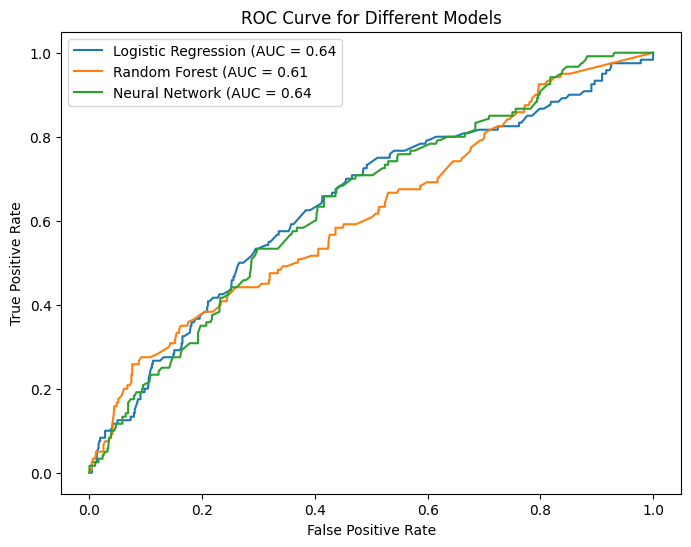

In [ ]:
# Model Training
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)
}
# Model Evaluation
plt.figure(figsize=(8, 6))
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(classification_report(y_test, y_pred))

    # ROC Curve
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc(fpr, tpr):.2f}')

# Plot ROC Curve only if any model supports probability prediction
if any(hasattr(model, "predict_proba") for model in models.values()):
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Different Models')
    plt.legend()
    plt.show()
else:
    print("No models with probability predictions for ROC Curve.")